In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 150
import warnings
warnings.filterwarnings('ignore')

##  Load the data

In [32]:
data_log_reg = pd.read_csv('new_feat_train_small.csv', index_col ='match_id_hash')
target = pd.read_csv('train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win'].apply(lambda x: int(x))

data_log_reg.head()

,d_dead,r_dead,d_health_avg,r_health_avg,d1_in_r_base,r1_in_r_base,d1_in_d_base,r1_in_d_base,d2_in_r_base,r2_in_r_base,...,log_d_damage_received,log_r_max_hero_hit,log_d_max_hero_hit,log_chat_len,log_game_time,log_ratio_assists,sq_r_gold,sq_r_xp,sq_d_gold,sq_d_xp
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0,0,0.954967,0.715500,0,0,0,0,0,0,...,7.349874,5.209486,6.042633,2.484907,5.049856,0.000000,4149369,3964081,15586704,9511056
b9c57c450ce74a2af79c9ce96fac144d,0,0,0.764778,0.846735,0,1,0,0,0,0,...,10.104794,6.877296,6.639876,2.397895,6.490724,1.504077,330221584,308564356,172764736,167055625
6db558535151ea18ca70a6892197db41,0,0,0.989032,0.989333,0,0,1,0,0,0,...,4.262680,4.262680,4.234107,0.000000,3.091042,0.000000,774400,0,230400,0
46a0ddce8f7ed2a8d9bd5edcbb925682,0,0,0.869557,0.955818,0,0,0,0,0,0,...,10.034910,6.651572,6.169611,1.609438,6.357842,1.609438,178169104,215003569,127712601,140256649
b1b35ff97723d9b7ade1c9c3cf48f770,0,0,0.808481,0.735127,0,0,0,0,0,0,...,9.148997,6.129050,6.499787,1.386294,6.118097,0.693147,65270241,95296644,84217329,116769636


In [3]:
# smaller dataset
cat_feats = ['game_mode','lobby_type', 'r_firstblood_claimed','d_firstblood_claimed', 'r_in_r_base', 'd_in_d_base', 'r_in_d_base', 'd_in_r_base']
num_feats = [col for col in data_log_reg.columns if col not in cat_feats]
numerical_columns =[]
for j in range(len(data_log_reg.columns)):
    if data_log_reg.columns[j] in num_feats:
        numerical_columns.append(j)

## Scale the data and encode categorical variables

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(), num_feats),
    (OneHotEncoder(),cat_feats))



In [5]:
from sklearn.model_selection import train_test_split

# X = data_log_reg
X = preprocess.fit_transform(data_log_reg)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=150)

In [6]:
X_train.shape

(27772, 178)

## Perform RFECV with unregularized logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score


logreg = LogisticRegression(C = 1 ,penalty = 'none', solver = 'newton-cg' )

In [10]:
from sklearn.feature_selection import RFECV


feat_selector = RFECV(logreg, step = 1, cv = 5, min_features_to_select = 20, scoring = 'roc_auc')
feat_selector = feat_selector.fit(X_train, y_train)

Text(0, 0.5, 'CV score')

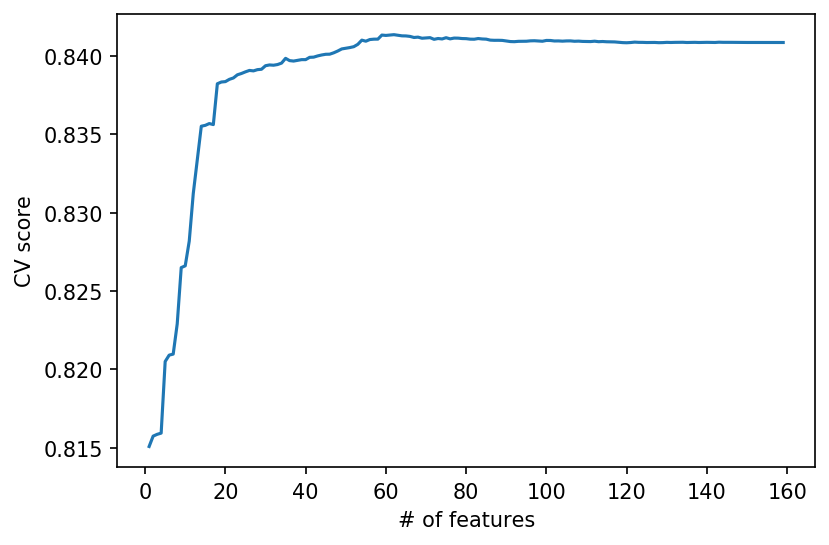

In [40]:
plt.plot(range(1, len(feat_selector.grid_scores_) + 1), feat_selector.grid_scores_)
plt.xlabel('# of features')
plt.ylabel('CV score')

## Train regularized logistic regression on selected features

In [12]:
# select only the matrix of meaningfull features
X_train_new = feat_selector.transform(X_train)
X_test_new = feat_selector.transform(X_test)


In [44]:
# train the model
logreg = LogisticRegression(C = 10,penalty = 'l1',fit_intercept=False, random_state = 150 )
logreg.fit(X_train_new,y_train)

predicted = logreg.predict(X_test_new)
print('test accuracy : {}'.format(accuracy_score(y_test, predicted)))
predicted = logreg.predict_proba(X_test_new)[:,1]
print('test roc_auc score: {}'.format(roc_auc_score(y_test,predicted)))

test accuracy : 0.7559438796941947
test roc_auc score: 0.8443826357686185


## Compare to the model with the full set of features

In [45]:
# fit the model
logreg = LogisticRegression(C = 10,penalty = 'l1',fit_intercept=False, random_state = 150 )
logreg.fit(X_train,y_train)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=150, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

test accuracy : 0.7581282029740402
test roc_auc score: 0.8453594763842207


Text(0.5, 0, 'coefficients of regression')

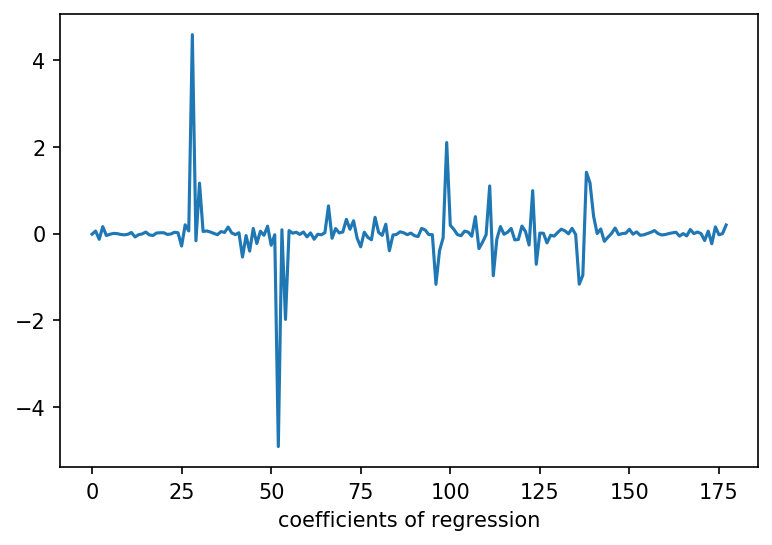

In [48]:
predicted = logreg.predict(X_test)
print('test accuracy : {}'.format(accuracy_score(y_test, predicted)))
predicted = logreg.predict_proba(X_test)[:,1]
print('test roc_auc score: {}'.format(roc_auc_score(y_test,predicted)))
c = logreg.coef_
plt.plot(c[0])
plt.xlabel('coefficients of regression')

 The reduced set of features has the same test scores as the full set of features.